# Payment classification pipeline

In [2]:
import mlrun

In [3]:
project = mlrun.get_or_create_project(
    name="sagemaker", 
    user_project=True,
    parameters={
        # "source" : "git://github.com/mlrun/demo-sagemaker#main",
        "default_image" : "yonishelach/sagemaker-demo"
    }
)

> 2024-02-12 13:44:28,481 [info] Project loaded successfully: {'project_name': 'sagemaker'}


### 1. Run the pipeline remotely <a class="anchor" id="Setup"></a>

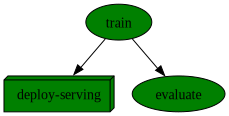

uid,start,state,name,parameters,results
...6a004109,Feb 12 13:51:31,completed,evaluate,model_path=store://artifacts/sagemaker-admin/train_model_path@eb48cc6e-d6ae-4a2d-947f-600a6e4cd469model_name=xgboost-modellabel_column=transaction_category,
...d67ee105,Feb 12 13:44:38,completed,train,,


eb48cc6e-d6ae-4a2d-947f-600a6e4cd469

In [4]:
project.run(
    name="sagemaker",
    watch=True,
)

### 2. Infer the deployed model

In [5]:
# get the serving function:
serving_function = project.get_function("serving", sync=True)

In [6]:
sample = [
    4630518417004166.0,
    4898290331783278.0,
    67.18,
    2021.0,
    1.0,
    10.0,
    23.0,
    57.0,
    10.0,
    428.65735483870964,
    15.970618109151054,
    33.79710992816166,
    284.6275883256528,
    40.229440860215064,
    137.55919713261648,
    429.58608602150537,
    2846.4932473118283,
    308.04887096774195,
    714.2121989247312,
    138.27715053763438,
    783.9734946236558,
    33.73750272435426,
    35.675963606286196,
    52.41640479636139,
    26.06939321893735,
    16.107552848441422,
    5957.367483870968,
    47.59955807703791,
]

In [7]:
serving_function.invoke(path='/predict', body={"inputs": [sample]})

> 2024-01-30 09:00:00,436 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-sagemaker-yoni-serving.default-tenant.svc.cluster.local:8080/predict'}


{'id': 'cce12b91-6890-4de4-a584-0b23aa27aaac',
 'model_name': 'xgboost-model',
 'predictions': [1],
 'confidences': [0.43330907821655273]}